## INFSYS 722 - Iteration 4
ID: 168395378
<br/>
Author: Paolo Gabriel Averia Delos Reyes

### 01 - Business Understanding

This section, we describe the business goals and objectives.

Our goal is o study and analyze global water treatment and water consumption. From there, compare the Philippines versus top countries and identify where the Philippines can improve on.

### 02 - Data Understanding

Loading the dataset to grasp what the data looks like.

#### Library imports

In [1]:
# PySpark libraries
import findspark
findspark.init('/home/ubuntu/spark-3.2.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnull, mean, isnan, when, count, col
spark = SparkSession.builder.appName('pdel145_iter4').getOrCreate()

# Visualisation
import numpy as np
import matplotlib.pyplot as plt

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/12 09:11:21 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


#### Loading the datasets

In [2]:
# Freshwater dataset
freshwater_df = spark.read.csv('data/freshwater.csv', inferSchema=True, header=True)

In [3]:
# Checking for its datatypes
freshwater_df.printSchema()

root
 |-- SDG: integer (nullable = true)
 |-- SDG target: double (nullable = true)
 |-- SDG indicator: string (nullable = true)
 |-- Indicator Code: string (nullable = true)
 |-- Indicator name: string (nullable = true)
 |-- Geographical area code: string (nullable = true)
 |-- Geographical area name: string (nullable = true)
 |-- Year: integer (nullable = true)
 |-- Value: double (nullable = true)
 |-- Time detail: string (nullable = true)
 |-- Source: string (nullable = true)
 |-- Footnote: string (nullable = true)
 |-- Type of data: string (nullable = true)
 |-- Units: string (nullable = true)
 |-- Age group: string (nullable = true)
 |-- Bounds: string (nullable = true)
 |-- Frequency: string (nullable = true)
 |-- Level/Status: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- Type of reporting: string (nullable = true)
 |-- Sex: string (nullable = true)
 |-- SDG 6 Data portal level: string (nullable = true)



In [4]:
# Viewing what the dataset contains
freshwater_df.show(n=5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | 6                                                                                                                             
 SDG target              | 6.4                                                                                                                           
 SDG indicator           | 6.4.2                                                                                                                         
 Indicator Code          | ER_H2O_STRESS                                                                                                                 
 Indicator name          | Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)                            
 Geographical area code  | Country                                          

In [5]:
# Same goes for the rest of the datasets that are of file format .csv
impr_sanit_df = spark.read.csv('data/improved_sanitation.csv', inferSchema=True, header=True)
renewable_df = spark.read.csv('data/renewable.csv', inferSchema=True, header=True)
safe_manage_drink_df = spark.read.csv('data/safely_managed_drinking.csv', inferSchema=True, header=True)
safe_manage_sanit_df = spark.read.csv('data/safely_managed_sanitation.csv', inferSchema=True, header=True)
tot_popul_df = spark.read.csv('data/total_population.csv', inferSchema=True, header=True)

#### Overview of the dataframes (e.g., summary and nulls)

In [6]:
freshwater_df.summary().show(truncate=False, vertical=True)

-RECORD 0---------------------------------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                                      
 SDG                     | 14465                                                                                                                      
 SDG target              | 14465                                                                                                                      
 SDG indicator           | 14465                                                                                                                      
 Indicator Code          | 14465                                                                                                                      
 Indicator name          | 14465                                                              

In [7]:
impr_sanit_df.summary().show(truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                 
 SDG                     | 0                                                                                     
 SDG target              | 0                                                                                     
 SDG indicator           | 15708                                                                                 
 Indicator Code          | 0                                                                                     
 Indicator name          | 15708                                                                                 
 Geographical area code  | 528                                                                                   
 Geographical area name  | 15708                                                        

In [8]:
renewable_df.summary().show(truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                              
 SDG                     | 34462                                                                                                              
 SDG target              | 34462                                                                                                              
 SDG indicator           | 34462                                                                                                              
 Indicator Code          | 34462                                                                                                              
 Indicator name          | 34462                                                                                                              

In [9]:
safe_manage_drink_df.summary().show(truncate=False, vertical=True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                
 SDG                     | 0                                                                                                    
 SDG target              | 0                                                                                                    
 SDG indicator           | 70686                                                                                                
 Indicator Code          | 0                                                                                                    
 Indicator name          | 70686                                                                                                
 Geographical area code  | 2376                                                                  

In [10]:
safe_manage_sanit_df.summary().show(truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                             
 SDG                     | 0                                                                                                 
 SDG target              | 0                                                                                                 
 SDG indicator           | 70686                                                                                             
 Indicator Code          | 0                                                                                                 
 Indicator name          | 70686                                                                                             
 Geographical area code  | 2376                                                                                       

In [11]:
tot_popul_df.summary().show(truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 summary                 | count                                                                                                                                                                                                                                                                                                                                                                                                                                                 
 SDG                     | 0                                        

#### Histogram of values per datasets

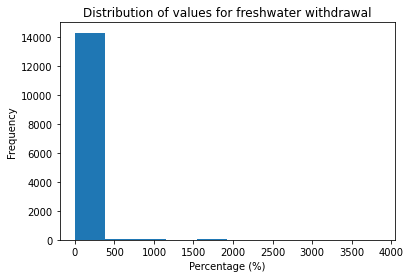

<Figure size 1728x1152 with 0 Axes>

In [12]:
temp = np.array(freshwater_df.select("Value").collect())
temp[temp == None] = 378

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for freshwater withdrawal")
plt.figure(figsize=(24,16))
plt.show()

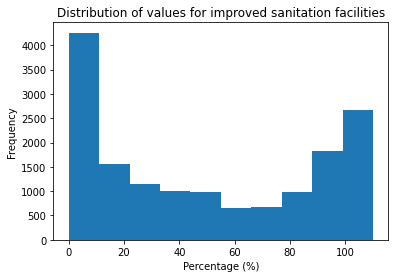

<Figure size 1728x1152 with 0 Axes>

In [13]:
temp = np.array(impr_sanit_df.select("Value").collect())
temp[temp == None] = 110 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for improved sanitation facilities")
plt.figure(figsize=(24,16))
plt.show()

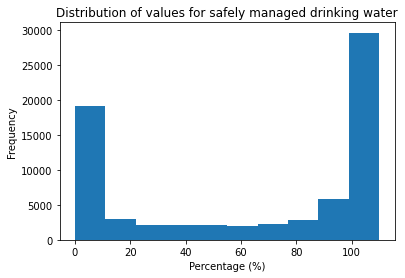

<Figure size 1728x1152 with 0 Axes>

In [14]:
temp = np.array(safe_manage_drink_df.select("Value").collect())
temp[temp == None] = 110 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for safely managed drinking water")
plt.figure(figsize=(24,16))
plt.show()

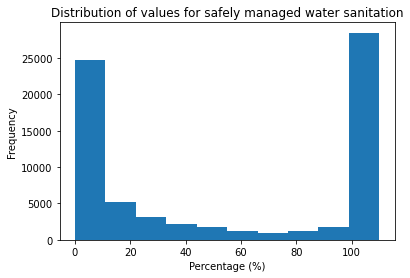

<Figure size 1728x1152 with 0 Axes>

In [15]:
temp = np.array(safe_manage_sanit_df.select("Value").collect())
temp[temp == None] = 110 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(temp)
plt.xlabel("Percentage (%)")
plt.ylabel("Frequency")
plt.title("Distribution of values for safely managed water sanitation")
plt.figure(figsize=(24,16))
plt.show()

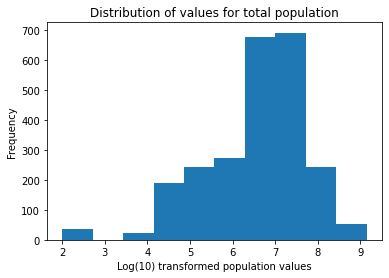

<Figure size 1728x1152 with 0 Axes>

In [16]:
temp = np.array(tot_popul_df.select("Value").collect())
temp[temp == None] = 100 # range of values are from 0 - 100. Setting it to 110 would allow us to see how distributed values are

plt.hist(np.log10(temp.astype(float)))
plt.xlabel("Log(10) transformed population values")
plt.ylabel("Frequency")
plt.title("Distribution of values for total population")
plt.figure(figsize=(24,16))
plt.show()

### 3. Data Preparation
Pre-processing of the data.

In [17]:
# Freshwater: Filter out global data and countries only
freshwater_df_filtered = freshwater_df.filter((freshwater_df['Type of data'] == "Global monitoring data") 
                                              & (freshwater_df['Geographical area code'] == "Country"))

freshwater_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | 6                                                                                                                             
 SDG target              | 6.4                                                                                                                           
 SDG indicator           | 6.4.2                                                                                                                         
 Indicator Code          | ER_H2O_STRESS                                                                                                                 
 Indicator name          | Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)                            
 Geographical area code  | Country                                          

In [18]:
# Select rows where 'Geographical area code' is null (or not sdg)
impr_sanit_df_filtered = impr_sanit_df.filter(isnull(impr_sanit_df['Geographical area code']))

impr_sanit_df_filtered.show(n=5, truncate=False, vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------------
 SDG                     | null                                                                                  
 SDG target              | null                                                                                  
 SDG indicator           | 6.1.1                                                                                 
 Indicator Code          | null                                                                                  
 Indicator name          | Drinking water, Piped improved                                                        
 Geographical area code  | null                                                                                  
 Geographical area name  | Uganda                                                                                
 Year                    | 2012                                                         

In [19]:
# Renewable
renewable_df_filtered = renewable_df.filter((renewable_df['Type of data'] == "Global monitoring data") 
                                            | (renewable_df["Type of data"] == "Non-relevant")
                                            & (renewable_df['Geographical area code'] == "Country"))

renewable_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------
 SDG                     | 6                                                                                         
 SDG target              | 6.4                                                                                       
 SDG indicator           | 6.4.1                                                                                     
 Indicator Code          | ER_H2O_WUEYST                                                                             
 Indicator name          | Water Use Efficiency (United States dollars per cubic meter)                              
 Geographical area code  | Country                                                                                   
 Geographical area name  | United Republic of Tanzania                                                               
 Year                    | 2012                         

In [20]:
# Safely managed drinking water dataset
safe_manage_drink_df_filtered = safe_manage_drink_df.filter((isnull(safe_manage_drink_df["Geographical area code"])) 
                                                     & (safe_manage_drink_df["Location"] == "National"))

safe_manage_drink_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0-----------------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | null                                                                                                                         
 SDG target              | null                                                                                                                         
 SDG indicator           | 6.1.1                                                                                                                        
 Indicator Code          | null                                                                                                                         
 Indicator name          | Drinking water, At least basic service                                                                                       
 Geographical area code  | null                                                   

In [21]:
# Safely managed sanitation facilities dataset
safe_manage_sanit_df_filtered = safe_manage_sanit_df.filter((isnull(safe_manage_sanit_df["Geographical area code"])) 
                                                     & (safe_manage_sanit_df["Location"] == "National"))

safe_manage_sanit_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------------------------------------------------------------------------------------
 SDG                     | null                                                                                                               
 SDG target              | null                                                                                                               
 SDG indicator           | 6.2.1a                                                                                                             
 Indicator Code          | null                                                                                                               
 Indicator name          | Sanitation, At least basic service                                                                                 
 Geographical area code  | null                                                                                                               

In [22]:
# Total population
tot_popul_df_filtered = tot_popul_df.filter(tot_popul_df["Geographical area code"] == "Country")

tot_popul_df_filtered.show(n = 5, truncate=False, vertical=True)

-RECORD 0---------------------------------------
 SDG                     | null                 
 SDG target              | null                 
 SDG indicator           | SP.POP.TOTL          
 Indicator Code          | SP.POP.TOTL          
 Indicator name          | Population           
 Geographical area code  | Country              
 Geographical area name  | Sudan                
 Year                    | 2012                 
 Value                   | 35159792             
 Time detail             | null                 
 Source                  | World Bank           
 Footnote                | null                 
 Type of data            | null                 
 Units                   | Number of people     
 Age group               | null                 
 Bounds                  | null                 
 Frequency               | null                 
 Level/Status            | null                 
 Location                | null                 
 Type of reporting  

#### Restructuring the filtered dataframes to pivot values in indicator as columns.

In [23]:
freshwater_df_filtered = freshwater_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

freshwater_df_filtered.show(n = 5, vertical = True)

-RECORD 0------------------------------------------------------------------------------------------------------------------
 Geographical area name                                                                             | Antigua and Barbuda  
 Year                                                                                               | 2017                 
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 4.23                 
-RECORD 1------------------------------------------------------------------------------------------------------------------
 Geographical area name                                                                             | Azerbaijan           
 Year                                                                                               | 2012                 
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 27.009999999999998   
-RECORD 

In [24]:
impr_sanit_df_filtered = impr_sanit_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

impr_sanit_df_filtered.show(n = 5, vertical = True)

-RECORD 0------------------------------------------------------
 Geographical area name                 | Guatemala            
 Year                                   | 2018                 
 null                                   | null                 
 Drinking water, Non-piped improved     | 16.755722069822      
 Drinking water, Piped improved         | 77.408896058041      
 Sanitation, Improved latrine and other | 25.116499817496      
 Sanitation, Septic tank                | 9.4860811686276      
 Sanitation, Sewer                      | 43.6284943036        
 Sanitation, Total                      | 78.231075289724      
-RECORD 1------------------------------------------------------
 Geographical area name                 | Madagascar           
 Year                                   | 2018                 
 null                                   | null                 
 Drinking water, Non-piped improved     | 20.337612428654      
 Drinking water, Piped improved         

In [25]:
renewable_df_filtered = renewable_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

renewable_df_filtered.show(n = 5, vertical = True)

-RECORD 0--------------------------------------------------------------------------
 Geographical area name                                       | Colombia           
 Year                                                         | 2014               
 Groundwater produced internally                              | 510.0              
 Groundwater: entering the country (total)                    | 0.0                
 Overlap: between surface water and groundwater               | 510.0              
 Surface water produced internally                            | 2145.0             
 Surface water: entering the country (total)                  | 215.0              
 Total internal renewable water resources (IRWR)              | 2145.0             
 Total renewable groundwater                                  | 510.0              
 Total renewable surface water                                | 2360.0             
 Total renewable water resources                              | 2360.0      

In [26]:
safe_manage_drink_df_filtered = safe_manage_drink_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

safe_manage_drink_df_filtered.show(n = 5, vertical = True)

-RECORD 0------------------------------------------------------
 Geographical area name                 | Iran (Islamic Rep... 
 Year                                   | 2016                 
 Drinking water, At least basic service | null                 
 Drinking water, Available              | null                 
 Drinking water, Basic service          | 3.553270578          
 Drinking water, Free of contamination  | 96.29471676          
 Drinking water, Limited                | 1.982387223          
 Drinking water, On premises            | 93.37181289          
 Drinking water, Safely managed service | 93.37181289          
 Drinking water, Surface water          | 0.074873581          
 Drinking water, Unimproved             | 1.01765584           
-RECORD 1------------------------------------------------------
 Geographical area name                 | Greenland            
 Year                                   | 2017                 
 Drinking water, At least basic service 

In [27]:
safe_manage_sanit_df_filtered = safe_manage_sanit_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

safe_manage_sanit_df_filtered.show(n = 5, vertical = True)

-RECORD 0--------------------------------------------------
 Geographical area name             | Azerbaijan           
 Year                               | 2012                 
 Sanitation, At least basic service | null                 
 Sanitation, Basic service          | 26.4825592           
 Sanitation, Disposed insitu        | 22.40526944          
 Sanitation, Faecal sludge treated  | 20.25774528          
 Sanitation, Limited service        | 3.185506082          
 Sanitation, Open defecation        | 0.176239299          
 Sanitation, Safely managed service | 63.38538526          
 Sanitation, Sewage treated         | 20.515499            
 Sanitation, Unimproved             | 6.770309811          
-RECORD 1--------------------------------------------------
 Geographical area name             | Antigua and Barbuda  
 Year                               | 2017                 
 Sanitation, At least basic service | 97.39399996          
 Sanitation, Basic service          | nu

In [28]:
tot_popul_df_filtered = tot_popul_df_filtered.groupby("Geographical area name", "Year")\
.pivot("Indicator name").agg(mean("Value"))

tot_popul_df_filtered.show(n = 5, vertical = True)

-RECORD 0--------------------------------------
 Geographical area name | Seychelles           
 Year                   | 2022                 
 Population             | 100060.0             
-RECORD 1--------------------------------------
 Geographical area name | Bermuda              
 Year                   | 2018                 
 Population             | 63918.0              
-RECORD 2--------------------------------------
 Geographical area name | Greenland            
 Year                   | 2017                 
 Population             | 56172.0              
-RECORD 3--------------------------------------
 Geographical area name | China, Hong Kong ... 
 Year                   | 2018                 
 Population             | 7452600.0            
-RECORD 4--------------------------------------
 Geographical area name | Colombia             
 Year                   | 2014                 
 Population             | 4.6677947E7          
only showing top 5 rows



#### Merging the restructured dataframes into one merged_df

In [29]:
# Inner join all datasets
merged_df = freshwater_df_filtered.join(impr_sanit_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(renewable_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(safe_manage_drink_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(safe_manage_sanit_df_filtered, on=["Year", "Geographical area name"], how="inner") \
               .join(tot_popul_df_filtered, on=["Year", "Geographical area name"], how="inner")

# Dropping null generated columns
merged_df = merged_df.drop("null")

merged_df.show(n = 5, vertical = True)

23/10/12 09:12:08 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


-RECORD 0-----------------------------------------------------------------------------------------------------------------
 Year                                                                                               | 2018                
 Geographical area name                                                                             | Guatemala           
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 2.87                
 Drinking water, Non-piped improved                                                                 | 16.755722069822     
 Drinking water, Piped improved                                                                     | 77.408896058041     
 Sanitation, Improved latrine and other                                                             | 25.116499817496     
 Sanitation, Septic tank                                                                            | 9.4860811686276     
 Sanitation, Sew

#### Dealing with the null values/column

New: Setting a threshold of null values allowed per row. Since we have a total of 38 features, we can remove the rows with greater than 10% of the total features (4).

In [30]:
# Checking the number of null values in all columns
merged_df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in merged_df.columns]).show(vertical=True)

-RECORD 0--------------------------------------------------------------------------------------------------
 Year                                                                                               | 0    
 Geographical area name                                                                             | 0    
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 0    
 Drinking water, Non-piped improved                                                                 | 71   
 Drinking water, Piped improved                                                                     | 71   
 Sanitation, Improved latrine and other                                                             | 27   
 Sanitation, Septic tank                                                                            | 108  
 Sanitation, Sewer                                                                                  | 36   
 Sanitation, Total          

In [31]:
# Removing the rows that exceed a certain threshold
merged_df = merged_df.na.drop(thresh=len(merged_df.columns)-5)

# Replacing the null values in Population with a fixed number of people
merged_df = merged_df.na.fill(5000, subset=['Population'])

# Replacing the null values with -1
merged_df = merged_df.na.fill(-1)

merged_df.show(n=5, vertical=True)

-RECORD 0----------------------------------------------------------------------------------------------------------------
 Year                                                                                               | 2018               
 Geographical area name                                                                             | Madagascar         
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 5.630000000000001  
 Drinking water, Non-piped improved                                                                 | 20.337612428654    
 Drinking water, Piped improved                                                                     | 33.987609131008    
 Sanitation, Improved latrine and other                                                             | 24.062649755379    
 Sanitation, Septic tank                                                                            | 6.272060858767     
 Sanitation, Sewer      

### 4. Data Transformation
Transform data through statistical methods before applying feature selection.

In [32]:
# Creating the assembler to transform the values into a MinMaxScaler
# Import VectorAssembler and Vectors
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=[
 'Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%)',
 'Drinking water, Non-piped improved', 'Drinking water, Piped improved', 'Sanitation, Improved latrine and other',
 'Sanitation, Septic tank', 'Sanitation, Sewer', 'Sanitation, Total', 'Groundwater produced internally',
 'Groundwater: entering the country (total)', 'Overlap: between surface water and groundwater',
 'Surface water produced internally', 'Surface water: entering the country (total)',
 'Total internal renewable water resources (IRWR)', 'Total renewable groundwater', 'Total renewable surface water',
 'Total renewable water resources', 'Water Use Efficiency (United States dollars per cubic meter)',
 'Water resources: total external renewable', 'Drinking water, At least basic service', 'Drinking water, Available',
 'Drinking water, Basic service', 'Drinking water, Free of contamination', 'Drinking water, Limited',
 'Drinking water, On premises', 'Drinking water, Safely managed service', 'Drinking water, Surface water',
 'Drinking water, Unimproved', 'Sanitation, At least basic service', 'Sanitation, Basic service', 'Sanitation, Disposed insitu',
 'Sanitation, Faecal sludge treated', 'Sanitation, Limited service', 'Sanitation, Open defecation',
 'Sanitation, Safely managed service', 'Sanitation, Sewage treated',
 'Sanitation, Unimproved', 'Population'], outputCol = "features")

assembled_df = assembler.transform(merged_df)
assembled_df.show(n=1, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------
 Year                                                                                               | 2018                 
 Geographical area name                                                                             | Madagascar           
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 5.630000000000001    
 Drinking water, Non-piped improved                                                                 | 20.337612428654      
 Drinking water, Piped improved                                                                     | 33.987609131008      
 Sanitation, Improved latrine and other                                                             | 24.062649755379      
 Sanitation, Septic tank                                                                            | 6.272060858767       
 Sanitat

In [33]:
# using MinMaxScaler to transform my features
from pyspark.ml.feature import MinMaxScaler

# Create a MinMaxScaler
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_features")

# Compute summary statistics and generate the MinMaxScalerModel
scaler_model = scaler.fit(assembled_df)

# Rescale each unique feature to range [0, 1]
scaled_df = scaler_model.transform(assembled_df)

scaled_df.show(n=1, vertical=True)

-RECORD 0------------------------------------------------------------------------------------------------------------------
 Year                                                                                               | 2018                 
 Geographical area name                                                                             | Madagascar           
 Level of water stress: freshwater withdrawal as a proportion of available freshwater resources (%) | 5.630000000000001    
 Drinking water, Non-piped improved                                                                 | 20.337612428654      
 Drinking water, Piped improved                                                                     | 33.987609131008      
 Sanitation, Improved latrine and other                                                             | 24.062649755379      
 Sanitation, Septic tank                                                                            | 6.272060858767       
 Sanitat

#### Feature selection using correlation

In [34]:
import pandas as pd # just for visualisation
from pyspark.ml.stat import Correlation

matrix = Correlation.corr(scaled_df, "scaled_features").collect()[0][0]
corr_matrix = matrix.toArray().tolist()

corr_matrix_df = pd.DataFrame(data=corr_matrix) 
corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(2)

23/10/12 09:12:30 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.JNIBLAS
23/10/12 09:12:30 WARN InstanceBuilder$NativeBLAS: Failed to load implementation from:dev.ludovic.netlib.blas.ForeignLinkerBLAS
/home/ubuntu/spark-3.2.1-bin-hadoop2.7/python/pyspark/sql/context.py:125: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(
/tmp/ipykernel_5076/3006279487.py:8: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr_matrix_df.style.background_gradient(cmap='coolwarm').set_precision(2)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
0,1.00,-0.12,-0.13,-0.12,-0.11,0.21,0.13,-0.07,0.03,-0.07,-0.07,-0.05,-0.07,-0.07,-0.07,-0.07,0.44,-0.05,0.14,0.19,-0.16,-0.01,-0.09,0.13,0.02,-0.10,-0.12,-0.02,-0.08,-0.12,-0.02,-0.12,-0.10,0.18,0.22,-0.11,-0.03
1,-0.12,1.00,-0.76,0.57,0.07,-0.72,-0.61,-0.04,-0.11,-0.04,-0.10,0.13,-0.10,-0.04,-0.04,-0.04,-0.26,0.12,0.07,0.23,0.51,-0.53,0.53,-0.67,-0.58,0.48,0.50,0.13,-0.06,0.41,-0.30,0.63,0.48,-0.61,-0.67,0.52,0.15
2,-0.13,-0.76,1.00,-0.45,0.06,0.63,0.67,0.08,0.13,0.07,0.13,-0.05,0.13,0.08,0.09,0.09,0.15,-0.04,-0.01,-0.14,-0.39,0.46,-0.54,0.70,0.51,-0.56,-0.62,-0.07,0.21,-0.25,0.28,-0.56,-0.54,0.52,0.53,-0.56,-0.06
3,-0.12,0.57,-0.45,1.00,-0.19,-0.70,-0.41,-0.08,-0.13,-0.07,-0.12,0.00,-0.12,-0.08,-0.09,-0.09,-0.25,-0.00,0.06,0.19,0.40,-0.36,0.41,-0.59,-0.46,0.43,0.38,0.15,-0.10,0.66,-0.18,0.56,0.27,-0.44,-0.65,0.40,0.02
4,-0.11,0.07,0.06,-0.19,1.00,-0.30,0.20,0.00,0.02,0.01,-0.03,0.04,-0.03,0.00,-0.00,-0.00,-0.16,0.06,0.07,0.24,0.25,-0.13,-0.22,0.23,-0.08,-0.13,-0.22,-0.04,0.47,0.37,-0.09,-0.05,-0.13,-0.13,-0.27,-0.20,0.04
5,0.21,-0.72,0.63,-0.70,-0.30,1.00,0.74,0.07,0.13,0.06,0.12,-0.04,0.12,0.07,0.08,0.08,0.33,-0.04,-0.09,-0.22,-0.60,0.63,-0.60,0.78,0.70,-0.58,-0.66,-0.08,-0.03,-0.62,0.35,-0.67,-0.60,0.75,0.89,-0.62,-0.05
6,0.13,-0.61,0.67,-0.41,0.20,0.74,1.00,0.05,0.12,0.04,0.07,-0.03,0.07,0.05,0.05,0.05,0.19,-0.02,-0.04,-0.00,-0.41,0.59,-0.79,0.93,0.66,-0.66,-0.91,-0.03,0.26,-0.10,0.34,-0.62,-0.83,0.71,0.63,-0.81,-0.03
7,-0.07,-0.04,0.08,-0.08,0.00,0.07,0.05,1.00,-0.07,0.99,0.84,0.39,0.85,1.00,0.77,0.78,-0.11,0.38,0.06,0.09,-0.06,-0.00,-0.09,0.07,-0.00,-0.02,-0.03,-0.04,0.09,-0.02,0.05,-0.09,-0.07,0.02,0.02,-0.01,0.54
8,0.03,-0.11,0.13,-0.13,0.02,0.13,0.12,-0.07,1.00,-0.07,-0.07,-0.01,-0.07,-0.07,-0.06,-0.06,0.01,-0.02,0.15,-0.01,-0.11,-0.03,-0.10,0.13,-0.02,-0.09,-0.11,-0.03,0.01,-0.09,0.08,-0.11,-0.09,0.12,0.14,-0.10,-0.01
9,-0.07,-0.04,0.07,-0.07,0.01,0.06,0.04,0.99,-0.07,1.00,0.84,0.42,0.84,0.99,0.78,0.78,-0.11,0.42,0.06,0.10,-0.06,-0.00,-0.08,0.07,0.00,-0.01,-0.02,-0.04,0.09,-0.02,0.05,-0.08,-0.07,0.01,0.01,-0.00,0.53


In [35]:
# Creating a new dataframe only with the correlated features from feature selection
from pyspark.sql.functions import col

identified_features = ["Year", 
                       "Geographical area name",
                       "Drinking water, Piped improved",
                        "Sanitation, Sewer",
                        "Sanitation, Total",
                        "Drinking water, Free of contamination",
                        "Drinking water, On premises",
                        "Drinking water, Safely managed service",
                        "Sanitation, Basic service",
                        "Sanitation, Faecal sludge treated",
                        "Sanitation, Safely managed service",
                        "Sanitation, Sewage treated"]

model_df = merged_df.select(*identified_features)

# Transform the values
predictors = VectorAssembler(inputCols=["Drinking water, Piped improved",
                        "Sanitation, Sewer",
                        "Sanitation, Total",
                        "Drinking water, Free of contamination",
                        "Drinking water, On premises",
                        "Sanitation, Basic service",
                        "Sanitation, Faecal sludge treated",
                        "Sanitation, Safely managed service",
                        "Sanitation, Sewage treated"], outputCol = "predictors")

target = VectorAssembler(inputCols=["Drinking water, Safely managed service"], outputCol="target")

model_transformed_df = predictors.transform(model_df)
model_transformed_df = target.transform(model_transformed_df)

scaler_predictors = MinMaxScaler(inputCol="predictors", outputCol="scaled_predictors")
scaler_target = MinMaxScaler(inputCol="target", outputCol="scaled_target")


scaler_model = scaler_predictors.fit(model_transformed_df)
model_scaled_df = scaler_model.transform(model_transformed_df)

scaler_model = scaler_target.fit(model_scaled_df)
model_scaled_df = scaler_model.transform(model_scaled_df)

model_scaled_df.show(n=5, vertical=True)

-RECORD 0------------------------------------------------------
 Year                                   | 2018                 
 Geographical area name                 | Madagascar           
 Drinking water, Piped improved         | 33.987609131008      
 Sanitation, Sewer                      | 1.1050826429214      
 Sanitation, Total                      | 31.439793257068      
 Drinking water, Free of contamination  | 25.62317372          
 Drinking water, On premises            | 20.68931254          
 Drinking water, Safely managed service | 19.35982306          
 Sanitation, Basic service              | 2.026450396          
 Sanitation, Faecal sludge treated      | 0.0                  
 Sanitation, Safely managed service     | 10.6205949           
 Sanitation, Sewage treated             | 0.221767609          
 predictors                             | [33.987609131008,... 
 target                                 | [19.35982306]        
 scaled_predictors                      

In [36]:
# Convert scaled_target column from vector to numeric
from pyspark.sql.functions import udf
from pyspark.sql.types import FloatType

# Define a UDF to extract the first element from the struct and cast it to Float
def extract_first_element(vector):
    return float(vector[0])

# Register the UDF
udf_extract_first_element = udf(extract_first_element, FloatType())

# Apply the UDF to convert the struct to Float
model_scaled_df = model_scaled_df.withColumn("scaled_target", udf_extract_first_element(model_scaled_df["scaled_target"]))

### 5. Data Mining Method Selection

### 6. Data Mining Algorithm Selection
1. Linear Regression
2. Random Forest Regressor
3. Decision Tree

#### 1. Linear Regression

In [37]:
# 1. Linear Regression
from pyspark.ml.regression import LinearRegression

lr = LinearRegression(featuresCol='scaled_predictors', labelCol='scaled_target', predictionCol='pred')

# Splitting the data 80/20
train_data, test_data = model_scaled_df.randomSplit([0.8,0.2])

train_data.describe().show(vertical=True)
test_data.describe().show(vertical=True)

lrModel = lr.fit(train_data)

-RECORD 0-----------------------------------------------------
 summary                                | count               
 Year                                   | 863                 
 Geographical area name                 | 863                 
 Drinking water, Piped improved         | 863                 
 Sanitation, Sewer                      | 863                 
 Sanitation, Total                      | 863                 
 Drinking water, Free of contamination  | 863                 
 Drinking water, On premises            | 863                 
 Drinking water, Safely managed service | 863                 
 Sanitation, Basic service              | 863                 
 Sanitation, Faecal sludge treated      | 863                 
 Sanitation, Safely managed service     | 863                 
 Sanitation, Sewage treated             | 863                 
 scaled_target                          | 863                 
-RECORD 1----------------------------------------------

-RECORD 0----------------------------------------------------
 summary                                | count              
 Year                                   | 201                
 Geographical area name                 | 201                
 Drinking water, Piped improved         | 201                
 Sanitation, Sewer                      | 201                
 Sanitation, Total                      | 201                
 Drinking water, Free of contamination  | 201                
 Drinking water, On premises            | 201                
 Drinking water, Safely managed service | 201                
 Sanitation, Basic service              | 201                
 Sanitation, Faecal sludge treated      | 201                
 Sanitation, Safely managed service     | 201                
 Sanitation, Sewage treated             | 201                
 scaled_target                          | 201                
-RECORD 1----------------------------------------------------
 summary

23/10/12 09:12:48 WARN Instrumentation: [4939c9a0] regParam is zero, which might cause numerical instability and overfitting.
23/10/12 09:12:48 WARN InstanceBuilder$NativeLAPACK: Failed to load implementation from:dev.ludovic.netlib.lapack.JNILAPACK


In [38]:
# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))

Coefficients: [-0.04827991101720461,-0.001839522260588131,-0.24355907861475412,0.8516839736192888,0.42468659717944585,-0.026296686167580286,-0.01867091073466009,-0.002105559667417235,0.06525625872926981]


Intercept:-0.054378511906414365


In [39]:
# Summarize the model over the training set and print out some metrics.
trainingSummary = lrModel.summary

# Show residuals
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

+--------------------+
|           residuals|
+--------------------+
|-0.12778802757788044|
|  0.0675488442035247|
|-0.12820417804443973|
|-0.03523517342152194|
|-0.07064927222117634|
|0.034540387083506596|
|-0.01129537035517...|
| 0.03576980477057834|
| 0.00954988651341969|
|-0.01580825568398...|
|0.018194566706965287|
|0.044443295656773074|
|0.027078534303120128|
| 0.04074413978801439|
|0.003741810980226676|
|0.025296365592268444|
|-0.08389162086217793|
|-0.01819273914960...|
|-0.04615256913870...|
|-0.03256274863463292|
+--------------------+
only showing top 20 rows

RMSE: 0.06414916593012933
r2: 0.9703362732296663


In [40]:
test_results = lrModel.evaluate(test_data)

# Residuals
test_results.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(test_results.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(test_results.r2))

+--------------------+
|           residuals|
+--------------------+
| 0.03367951431923211|
| -0.0712871132597029|
|4.909739954227499E-4|
| 0.12070351775889183|
|-0.07334512110335506|
| 0.06170999696769208|
| 0.04794642091214074|
| 0.03168257745554981|
|0.047671668642226606|
|0.045765278590392255|
| 0.07642191881294369|
|-0.03880112953204806|
|0.012406019665172296|
|-0.00461173591959...|
| 0.03137927457764472|
| 0.01440111163106661|
| 0.08878810454478658|
|0.003724650353558...|
| 0.03414088915157065|
|-0.10542636165236441|
+--------------------+
only showing top 20 rows

RMSE: 0.06453734862977059
r2: 0.9732004888742627


#### 2. Random Forest Regressor

In [41]:
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.evaluation import RegressionEvaluator

# Create a RandomForestRegressor model
rf = RandomForestRegressor(featuresCol="scaled_predictors", labelCol="scaled_target")

# Train the model
model = rf.fit(train_data)

# Make predictions on the test data
predictions = model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="scaled_target", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Print the Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE):", rmse)

# Print a summary of the model
print("Model Summary:")
print(model.toDebugString)

Root Mean Squared Error (RMSE): 0.04539332405456487
Model Summary:
RandomForestRegressionModel: uid=RandomForestRegressor_a691a8064dd3, numTrees=20, numFeatures=9
  Tree 0 (weight 1.0):
    If (feature 7 <= 0.6543680579702971)
     If (feature 3 <= 0.41578591034653467)
      If (feature 3 <= 0.14430989915841586)
       If (feature 3 <= 0.04613345929207921)
        Predict: 0.0
       Else (feature 3 > 0.04613345929207921)
        If (feature 0 <= 0.20484345293142575)
         Predict: 0.06924881200705256
        Else (feature 0 > 0.20484345293142575)
         Predict: 0.10089850031277713
      Else (feature 3 > 0.14430989915841586)
       If (feature 1 <= 0.020731502191911715)
        If (feature 5 <= 0.024179148990592755)
         Predict: 0.07654606364667416
        Else (feature 5 > 0.024179148990592755)
         Predict: 0.15136891092967103
       Else (feature 1 > 0.020731502191911715)
        If (feature 3 <= 0.32098686717821784)
         Predict: 0.25765812204730126
        Else

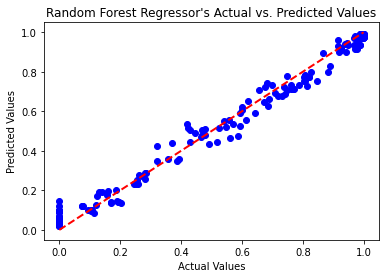

In [42]:
import matplotlib.pyplot as plt

# Collect the actual and predicted values from the test data
actual_values = test_data.select("scaled_target").rdd.map(lambda x: x[0]).collect()
predicted_values = predictions.select("prediction").rdd.map(lambda x: x[0]).collect()

# Create a scatter plot
plt.scatter(actual_values, predicted_values, c="b", marker="o")
plt.title("Random Forest Regressor's Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a line to represent perfect predictions
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle="--", color="red", linewidth=2)

# Display the plot
plt.show()

#### 3. Decision Tree

In [43]:
from pyspark.ml.regression import DecisionTreeRegressor

# Create a DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol="scaled_predictors", labelCol="scaled_target")

# Fit the model on the training data
dt_model = dt.fit(train_data)

# Make predictions on the test data
predictions = dt_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="scaled_target", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)

# Optionally, you can visualize the decision tree
print("Learned regression tree model:")
print(dt_model.toDebugString)

Root Mean Squared Error (RMSE): 0.037204627453629985
Learned regression tree model:
DecisionTreeRegressionModel: uid=DecisionTreeRegressor_3b666ae8315b, depth=5, numNodes=59, numFeatures=9
  If (feature 3 <= 0.5966746057920792)
   If (feature 3 <= 0.41578591034653467)
    If (feature 3 <= 0.14430989915841586)
     If (feature 3 <= 0.04613345929207921)
      Predict: 0.0
     Else (feature 3 > 0.04613345929207921)
      If (feature 0 <= 0.20484345293142575)
       Predict: 0.06931659330924352
      Else (feature 0 > 0.20484345293142575)
       Predict: 0.09953876501984066
    Else (feature 3 > 0.14430989915841586)
     If (feature 1 <= 0.020731502191911715)
      If (feature 4 <= 0.07021018909456062)
       Predict: 0.1074191393951575
      Else (feature 4 > 0.07021018909456062)
       Predict: 0.16586761484886037
     Else (feature 1 > 0.020731502191911715)
      If (feature 4 <= 0.7277786422421966)
       Predict: 0.2564529122844819
      Else (feature 4 > 0.7277786422421966)
       P

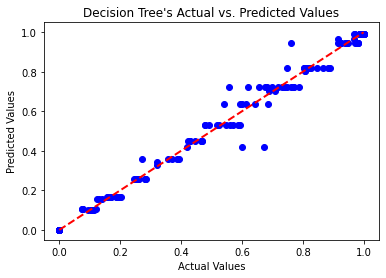

In [44]:
# Data Viz for Decision tree
actual_values = test_data.select("scaled_target").rdd.map(lambda x: x[0]).collect()
predicted_values = predictions.select("prediction").rdd.map(lambda x: x[0]).collect()

# Create a scatter plot
plt.scatter(actual_values, predicted_values, c="b", marker="o")
plt.title("Decision Tree's Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a line to represent perfect predictions
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle="--", color="red", linewidth=2)

# Display the plot
plt.show()

### 7. Data Mining

Run algos with hyperparameter tuning results on PH test dataset

In [45]:
# Create dataframes where philippines is excluded
philippines_df = model_scaled_df.filter(model_scaled_df["Geographical area name"] == "Philippines")
no_philippines_df = model_scaled_df.filter(model_scaled_df["Geographical area name"] != "Philippines")

# 80/20 split of no_philippines_df
#train_data, test_data = no_philippines_df.randomSplit([0.8,0.2])

# Create a RandomForestRegressor model
rf = RandomForestRegressor(featuresCol="scaled_predictors", labelCol="scaled_target")

# Train the model
model = rf.fit(no_philippines_df)

# Make predictions on the test data
predictions = model.transform(philippines_df)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="scaled_target", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)

# Print the Root Mean Squared Error (RMSE)
print("Root Mean Squared Error (RMSE):", rmse)

# Print a summary of the model
print("Model Summary:")
print(model.toDebugString)

Root Mean Squared Error (RMSE): 0.026974971326868227
Model Summary:
RandomForestRegressionModel: uid=RandomForestRegressor_060bfdefd37d, numTrees=20, numFeatures=9
  Tree 0 (weight 1.0):
    If (feature 7 <= 0.6705500160891089)
     If (feature 3 <= 0.4333853448019802)
      If (feature 6 <= 0.01718017595247629)
       If (feature 2 <= 0.5720087957249724)
        Predict: 0.4104551374912262
       Else (feature 2 > 0.5720087957249724)
        Predict: 0.42368754744529724
      Else (feature 6 > 0.01718017595247629)
       If (feature 3 <= 0.13090509301980197)
        If (feature 5 <= 0.08647943623522734)
         Predict: 0.05528735029308692
        Else (feature 5 > 0.08647943623522734)
         Predict: 0.0015952226362730328
       Else (feature 3 > 0.13090509301980197)
        If (feature 2 <= 0.4533256010228937)
         Predict: 0.13356215227395296
        Else (feature 2 > 0.4533256010228937)
         Predict: 0.264968995253245
     Else (feature 3 > 0.4333853448019802)
      If 

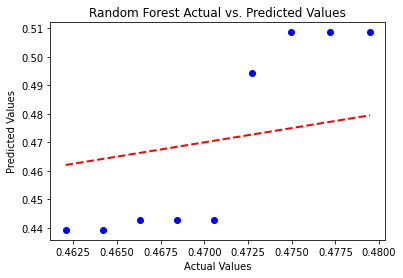

In [46]:
# Data Viz for Decision tree
actual_values = philippines_df.select("scaled_target").rdd.map(lambda x: x[0]).collect()
predicted_values = predictions.select("prediction").rdd.map(lambda x: x[0]).collect()

# Create a scatter plot
plt.scatter(actual_values, predicted_values, c="b", marker="o")
plt.title("Random Forest Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a line to represent perfect predictions
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle="--", color="red", linewidth=2)

# Display the plot
plt.show()

#### linear regression

In [47]:
lr = LinearRegression(featuresCol='scaled_predictors', labelCol='scaled_target', predictionCol='pred')

lrModel = lr.fit(no_philippines_df)

# Print the coefficients and intercept for linear regression
print("Coefficients: {}".format(str(lrModel.coefficients))) # For each feature...
print('\n')
print("Intercept:{}".format(str(lrModel.intercept)))

# Summarize the model over the training set and print out some metrics.
trainingSummary = lrModel.summary

# Show residuals
trainingSummary.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(trainingSummary.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(trainingSummary.r2))

test_results = lrModel.evaluate(philippines_df)

# Residuals
test_results.residuals.show()

# Print Root Mean Squared Error. 
print("RMSE: {}".format(test_results.rootMeanSquaredError))

# Print R-Squared.
print("r2: {}".format(test_results.r2))

23/10/12 09:16:09 WARN Instrumentation: [ec0dd26b] regParam is zero, which might cause numerical instability and overfitting.


Coefficients: [-0.046320009832570466,-0.004858291249315045,-0.24959304073349592,0.8574298722745002,0.4084451017489032,-0.014943027712859066,-0.01959730839756769,-0.002759501420836804,0.07761052079495363]


Intercept:-0.047923137662321195


+--------------------+
|           residuals|
+--------------------+
| 0.03089442020101474|
|-0.06873456850657467|
| 0.03324353131751423|
|-0.00933314057628...|
|-0.01916259720175617|
| 0.03754973690635724|
| 0.03841751057351428|
|0.012861028034236499|
| -0.2457141295779367|
| 0.11898876721807888|
|-0.00565102964203...|
|-0.03318508149673405|
|0.001724496013543...|
|0.010945298754268973|
| 0.01921129827570811|
|-0.08083623214373972|
| 0.04506565222346573|
| -0.1240546279763387|
|  0.0606917442012349|
| 0.03144524004603977|
+--------------------+
only showing top 20 rows

RMSE: 0.06385153084768543
r2: 0.971513146797479


+-------------------+
|          residuals|
+-------------------+
|0.06657831675414994|
|0.09356270533217048|
|   0.07342349547241|
|0.11946622673659918|
| 0.0869176161102887|
|0.08020385898717558|
|0.10664750961035685|
| 0.1001380390074153|
|0.11309019966927175|
+-------------------+

RMSE: 0.09488465718337877
r2: -285.8207356318225


#### Decision tree

In [48]:
# Create a DecisionTreeRegressor
dt = DecisionTreeRegressor(featuresCol="scaled_predictors", labelCol="scaled_target")

# Fit the model on the training data
dt_model = dt.fit(no_philippines_df)

# Make predictions on the test data
predictions = dt_model.transform(philippines_df)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="scaled_target", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE):", rmse)

# Optionally, you can visualize the decision tree
print("Learned regression tree model:")
print(dt_model.toDebugString)

Root Mean Squared Error (RMSE): 0.04117796078948298
Learned regression tree model:
DecisionTreeRegressionModel: uid=DecisionTreeRegressor_a22713a17d40, depth=5, numNodes=55, numFeatures=9
  If (feature 3 <= 0.5966746057920792)
   If (feature 3 <= 0.3890177987128713)
    If (feature 3 <= 0.04613345929207921)
     Predict: 0.0
    Else (feature 3 > 0.04613345929207921)
     If (feature 8 <= 0.01736764629207921)
      If (feature 4 <= 0.09850529363270769)
       Predict: 0.0965461503974227
      Else (feature 4 > 0.09850529363270769)
       Predict: 0.1554279850843625
     Else (feature 8 > 0.01736764629207921)
      If (feature 0 <= 0.7873663149792278)
       Predict: 0.25685330852866173
      Else (feature 0 > 0.7873663149792278)
       Predict: 0.36760593950748444
   Else (feature 3 > 0.3890177987128713)
    If (feature 4 <= 0.3306478958709668)
     If (feature 4 <= 0.15119516624607138)
      If (feature 2 <= 0.2671011352901561)
       Predict: 0.125069545848029
      Else (feature 2 >

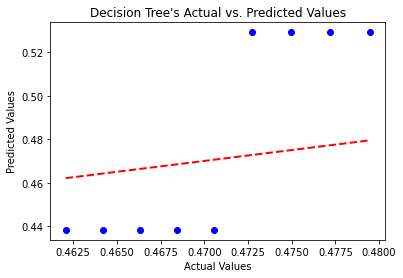

In [49]:
# Data Viz for Decision tree
actual_values = philippines_df.select("scaled_target").rdd.map(lambda x: x[0]).collect()
predicted_values = predictions.select("prediction").rdd.map(lambda x: x[0]).collect()

# Create a scatter plot
plt.scatter(actual_values, predicted_values, c="b", marker="o")
plt.title("Decision Tree's Actual vs. Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

# Add a line to represent perfect predictions
plt.plot([min(actual_values), max(actual_values)], [min(actual_values), max(actual_values)], linestyle="--", color="red", linewidth=2)

# Display the plot
plt.show()